In [9]:
import torch
import open_clip
from PIL import Image

In [2]:
clip_model_name = "ViT-B-32-quickgelu"
model, _, preprocess = open_clip.create_model_and_transforms(clip_model_name, pretrained='laion400m_e32')
tokenizer = open_clip.get_tokenizer(clip_model_name)

100%|███████████████████████████████████████| 605M/605M [01:23<00:00, 7.29MiB/s]


In [6]:
model

CLIP(
  (visual): VisionTransformer(
    (patchnorm_pre_ln): Identity()
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-

In [7]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    <function _convert_to_rgb at 0x128938310>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [8]:
tokenizer

<function open_clip.tokenizer.tokenize(texts: Union[str, List[str]], context_length: int = 77) -> torch.LongTensor>

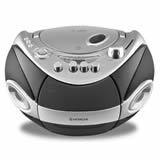

In [11]:
image

In [32]:
image = Image.open("../data/imagenette/val/n02979186/n02979186_8971.JPEG")
with torch.no_grad(), torch.cuda.amp.autocast():
    image = preprocess(image).unsqueeze(0)
    text = tokenizer(["a radio", "a dog", "a cat"])

    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    text_probs = (image_features @ text_features.T).softmax(dim=-1)
    print(text_probs)

tensor([[0.9833, 0.0088, 0.0079]])
